<a href="https://colab.research.google.com/github/FuRong1213-vibenshus/vibenshus/blob/master/CovidResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://python.plainenglish.io/beginners-data-science-project-using-numpy-pandas-and-matplotlib-c4608e196436

In [14]:
from google.colab import files
updated = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [16]:
df = pd.read_csv("owid-covid-data.csv")

In [ ]:
df.shape

(210442, 67)

In [24]:
df.head(-10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210886,ZWE,Africa,Zimbabwe,2022-08-09,256490.0,3.0,12.429,5586.0,2.0,0.777,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210887,ZWE,Africa,Zimbabwe,2022-08-10,256492.0,2.0,9.857,5587.0,1.0,0.616,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210888,ZWE,Africa,Zimbabwe,2022-08-11,256513.0,21.0,9.857,5587.0,0.0,0.616,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
210889,ZWE,Africa,Zimbabwe,2022-08-12,256522.0,9.0,11.143,5587.0,0.0,0.697,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [28]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.023640e+05,2.021250e+05,2.009480e+05,1.835940e+05,183543.000000,200024.000000,182678.000000,182627.000000,181460.000000,158113.000000,...,131167.000000,129370.000000,85172.000000,154079.000000,197318.000000,168912.000000,7.133000e+03,7133.000000,7153.000000,7133.000000
mean,3.956569e+06,1.261462e+04,1.263925e+04,7.050210e+04,146.468484,189.861529,651.212201,1.481611,1.481624,0.960628,...,10.658061,32.802263,50.864862,3.084487,73.639802,0.724956,4.540537e+04,9.686167,14.602563,1249.933634
std,2.481817e+07,8.713588e+04,8.514729e+04,3.644816e+05,755.297237,615.763424,939.509669,5.228900,3.434197,0.377826,...,10.602254,13.534309,31.844930,2.550805,7.447891,0.149702,1.268598e+05,13.724070,27.001289,1662.209599
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,3.640000e+03,0.000000e+00,6.714000e+00,1.060000e+02,0.000000,1.475000,27.010000,0.000000,0.004000,0.770000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,1.670000e+01,0.230000,-0.280000,10.629403
50%,4.334350e+04,6.300000e+01,1.004290e+02,1.066000e+03,1.000000,20.154500,190.249000,0.054000,0.229000,0.980000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.320800e+03,7.200000,7.220000,703.114715
75%,4.654725e+05,1.007000e+03,1.158893e+03,9.220000e+03,15.000000,137.424250,961.611000,1.076000,1.451000,1.160000,...,19.300000,41.300000,82.502000,4.000000,79.070000,0.845000,3.247450e+04,15.330000,20.420000,1964.233723
max,5.975793e+08,4.078816e+06,3.436381e+06,6.471261e+06,17758.000000,35258.843000,6388.135000,553.803000,148.673000,6.090000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.180000,9750.477354


In [32]:
'total_cases_per_million' in df.columns

False

In [25]:
df.drop(['new_deaths_smoothed', 'new_cases_per_million', 'total_cases_per_million'], axis=1, inplace=True)

KeyError: ignored

In [19]:
df.shape

(210901, 64)

In [33]:
continent_unique = list(df.continent.unique())

In [34]:
continent_unique

['Asia', nan, 'Europe', 'Africa', 'North America', 'South America', 'Oceania']

In [36]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,missing_value,missing_value,missing_value,missing_value,...,missing_value,missing_value,37.746,0.5,64.83,0.511,missing_value,missing_value,missing_value,missing_value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210896,ZWE,Africa,Zimbabwe,2022-08-19,256596.0,17.0,10.571,5589.0,0.0,0.661,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
210897,ZWE,Africa,Zimbabwe,2022-08-20,256616.0,20.0,13.429,5592.0,3.0,0.84,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
210898,ZWE,Africa,Zimbabwe,2022-08-21,256624.0,8.0,12.143,5592.0,0.0,0.759,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value
210899,ZWE,Africa,Zimbabwe,2022-08-22,256628.0,4.0,12.0,5592.0,0.0,0.75,...,1.6,30.7,36.791,1.7,61.49,0.571,missing_value,missing_value,missing_value,missing_value


In [37]:
df2.rename(columns={"date":"Date", "continent":"Continent", "location":"Country","iso_code":"ISO_code"}, inplace=True)

In [ ]:
df3=df2.groupby(["Date","Country",])
df3

##Lidt om groupby##

In [6]:
dff = pd.DataFrame({'Animal': ['Falcon', 'Falcon',
                              'Parrot', 'Parrot'],
                   'Max Speed': [380., 370., 24., 26.],
                   'Max Weight': [30, 35, 15, 20]})
dff

,Animal,Max Speed,Max Weight
0,Falcon,380.0,30
1,Falcon,370.0,35
2,Parrot,24.0,15
3,Parrot,26.0,20


In [9]:
dff.groupby(['Animal'])[['Animal', 'Max Weight', 'Max Speed']].mean()

,Max Weight,Max Speed
Animal,,
Falcon,32.5,375.0
Parrot,17.5,25.0


In [53]:
df3 = df2.groupby(['Date','Country',])[['Date','Country','total_cases','total_deaths','total_vaccinations']].sum().reset_index(drop=True)

In [ ]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,missing_value,missing_value,missing_value
1,2020-01-01,Mexico,missing_value,missing_value,missing_value
2,2020-01-02,Argentina,missing_value,missing_value,missing_value
3,2020-01-02,Mexico,missing_value,missing_value,missing_value
4,2020-01-03,Argentina,missing_value,missing_value,missing_value
...,...,...,...,...,...
210437,2022-08-21,Wallis and Futuna,761.0,7.0,missing_value
210438,2022-08-21,World,596169311.0,6453733.0,12500251659.0
210439,2022-08-21,Yemen,11915.0,2154.0,missing_value
210440,2022-08-21,Zambia,332264.0,4016.0,missing_value


In [54]:
df3['total_cases'].replace({'missing_value':0}, inplace=True)
df3['total_deaths'].replace({'missing_value':0}, inplace=True)
df3['total_vaccinations'].replace({'missing_value':0}, inplace=True)

In [55]:
df3

,Date,Country,total_cases,total_deaths,total_vaccinations
0,2020-01-01,Argentina,0.0,0.0,0.000000e+00
1,2020-01-01,Mexico,0.0,0.0,0.000000e+00
2,2020-01-02,Argentina,0.0,0.0,0.000000e+00
3,2020-01-02,Mexico,0.0,0.0,0.000000e+00
4,2020-01-03,Argentina,0.0,0.0,0.000000e+00
...,...,...,...,...,...
210896,2022-08-23,Wallis and Futuna,761.0,7.0,0.000000e+00
210897,2022-08-23,World,597579325.0,6457679.0,1.250874e+10
210898,2022-08-23,Yemen,11917.0,2154.0,0.000000e+00
210899,2022-08-23,Zambia,332527.0,4016.0,0.000000e+00


In [56]:
df4=df3[df3['total_deaths']>1000000]
df4[df4.Country=='World']

,Date,Country,total_cases,total_deaths,total_vaccinations
44367,2020-09-16,World,29929352.0,1004624.0,0.000000e+00
44591,2020-09-17,World,30244805.0,1010273.0,0.000000e+00
44815,2020-09-18,World,30571411.0,1016126.0,0.000000e+00
45039,2020-09-19,World,30864654.0,1021395.0,0.000000e+00
45263,2020-09-20,World,31119790.0,1025382.0,0.000000e+00
...,...,...,...,...,...
209981,2022-08-19,World,594905968.0,6468553.0,1.249331e+10
210210,2022-08-20,World,595477157.0,6469618.0,1.249618e+10
210439,2022-08-21,World,595959105.0,6471261.0,1.249972e+10
210668,2022-08-22,World,596671723.0,6454951.0,1.250475e+10


In [46]:
df4['Country'].unique()

array(['World', 'High income', 'Upper middle income', 'Europe',
       'South America', 'Asia', 'Lower middle income', 'North America',
       'European Union', 'United States'], dtype=object)

In [57]:
country_deaths_greaterthan1000000 = list(df4.Country.unique())

In [ ]:
country_deaths_greaterthan1000000

['World',
 'High income',
 'Upper middle income',
 'Europe',
 'South America',
 'Asia',
 'Lower middle income',
 'North America',
 'European Union',
 'United States']

In [48]:
df3[df3.Country=="World"]

,,Date,Country,total_cases,total_deaths,total_vaccinations
Date,Country,,,,,
2020-01-22,World,2020-01-22,World,557.0,17.0,0.000000e+00
2020-01-23,World,2020-01-23,World,657.0,18.0,0.000000e+00
2020-01-24,World,2020-01-24,World,944.0,26.0,0.000000e+00
2020-01-25,World,2020-01-25,World,1437.0,42.0,0.000000e+00
2020-01-26,World,2020-01-26,World,2120.0,56.0,0.000000e+00
...,...,...,...,...,...,...
2022-08-19,World,2022-08-19,World,594905968.0,6468553.0,1.249331e+10
2022-08-20,World,2022-08-20,World,595477157.0,6469618.0,1.249618e+10
2022-08-21,World,2022-08-21,World,595959105.0,6471261.0,1.249972e+10


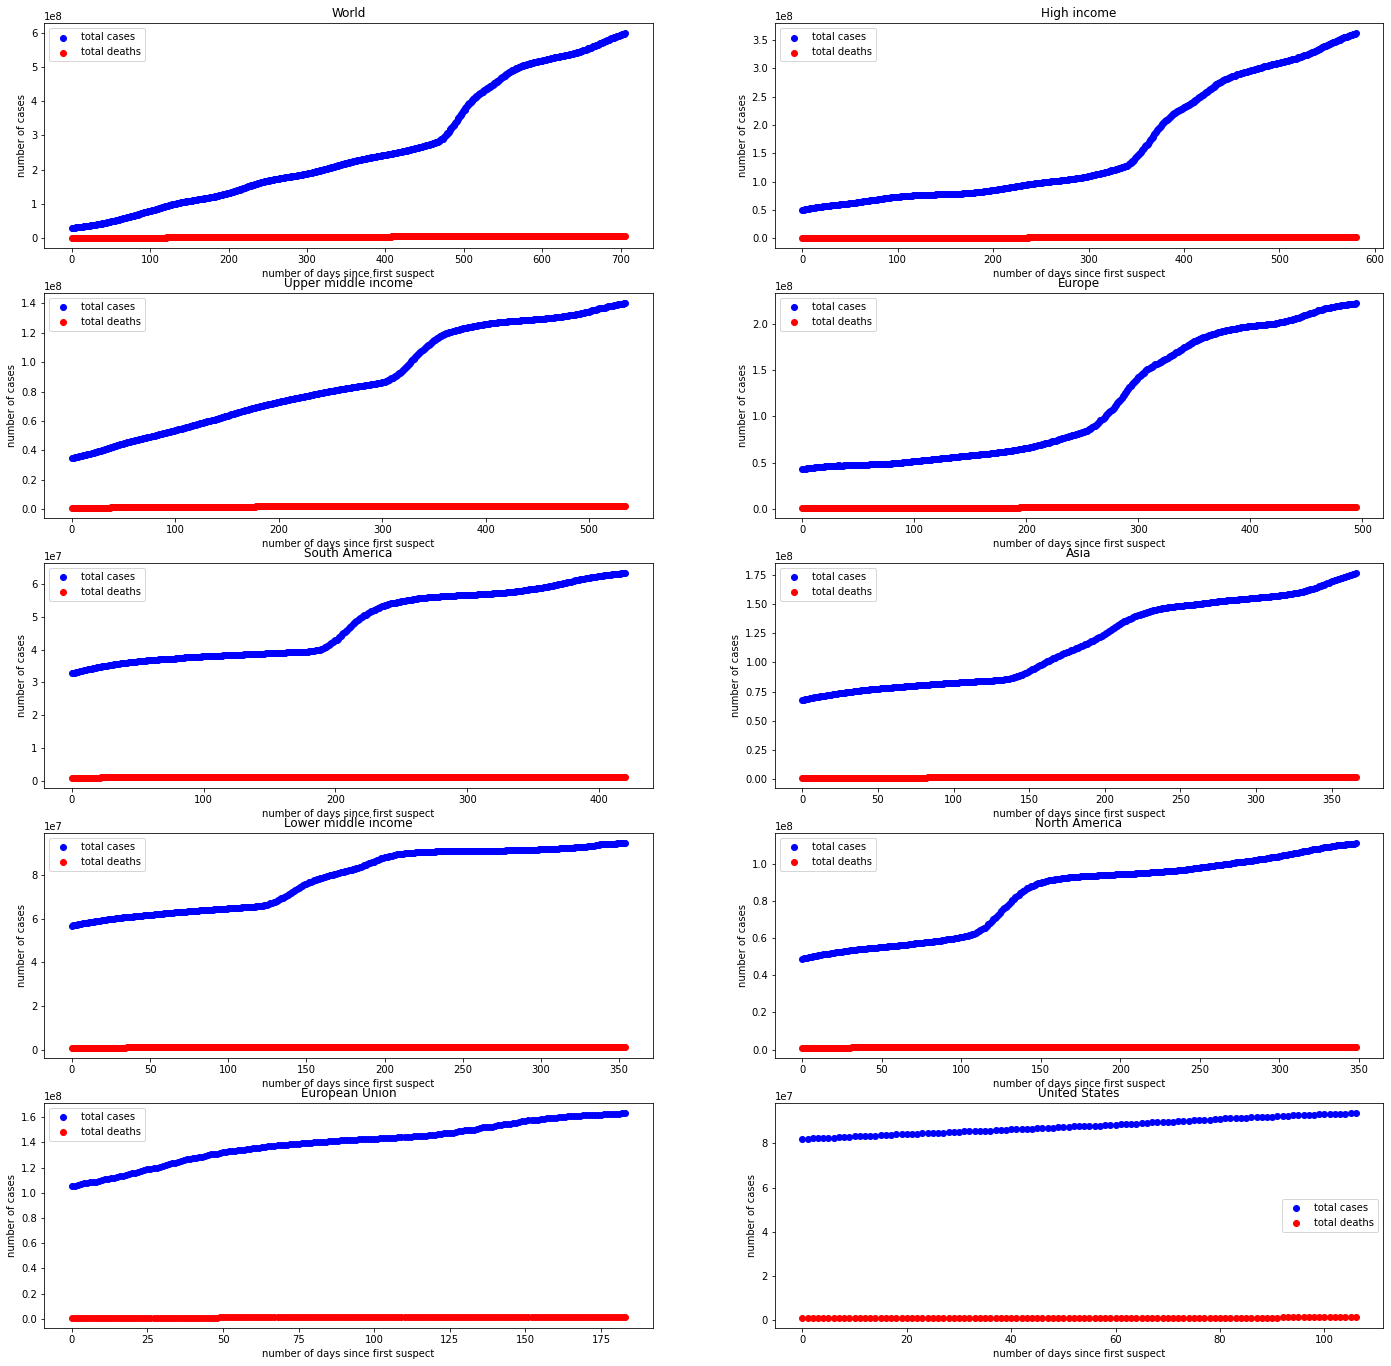

In [60]:
countries = df4.Country.unique()
number_of_countries = len(countries)
fig, axes = plt.subplots(5,2, figsize=(24, 24))

for idx, ax in enumerate(axes.flat):
  C = df4[df4['Country']==countries[idx]].reset_index()
  ax.scatter(np.arange(0, len(C)), C['total_cases'], color='blue', label='total cases')
  ax.scatter(np.arange(0, len(C)), C['total_deaths'], color='red', label='total deaths')
  #ax.scatter(np.arange(0, len(C)), C['total_vaccinations'], color='yellow', label='total vaccinations')
  ax.set_title(countries[idx])
  ax.set_xlabel("number of days since first suspect")
  ax.set_ylabel("number of cases")
  ax.legend()